      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MedHouseVal  
0     15.3  396.90   4.98         24.0  
1     17.8  396.90   9.14         21.6  
2     17.8  392.83   4.03         34.7  
3     18.7  394.63   2.94         33.4  
4     18.7  396.90   5.33         36.2  
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.7

C:\Users\laptop\AppData\Local\Temp\ipykernel_18832\3620351561.py:42: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["MedHouseVal"].fillna(data["MedHouseVal"].mean(), inplace=True)


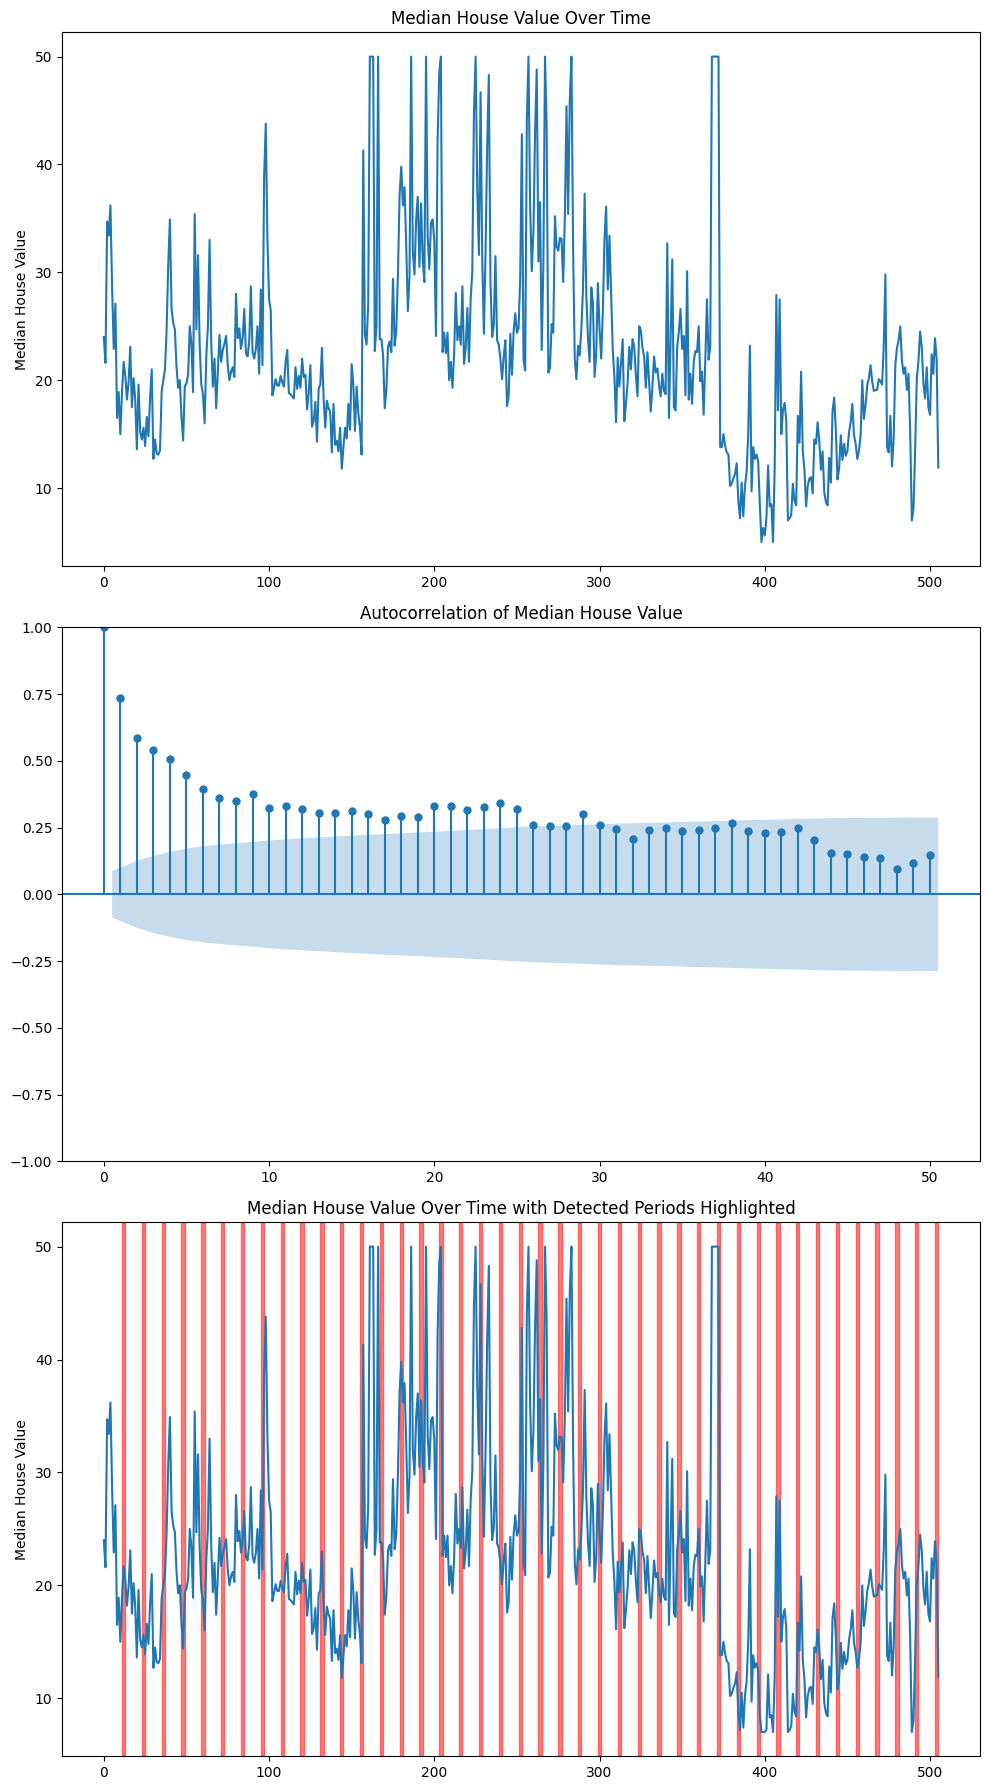

In [10]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Directly load the California housing dataset from a URL
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv"
names = [
    "CRIM",
    "ZN",
    "INDUS",
    "CHAS",
    "NOX",
    "RM",
    "AGE",
    "DIS",
    "RAD",
    "TAX",
    "PTRATIO",
    "B",
    "LSTAT",
    "MedHouseVal",
]
data = pd.read_csv(url, names=names)

# Display the first few rows of the dataset to understand the structure
print(data.head())

# Display statistical summary of the dataset
print(data.describe())

# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 18))

# Plot the Median House Value data over time
axs[0].plot(data["MedHouseVal"])
axs[0].set_title("Median House Value Over Time")
axs[0].set_ylabel("Median House Value")

# In case of missing values, fill them with the mean of the column
# In this case, there are no missing values, but this is a good practice to follow
data["MedHouseVal"].fillna(data["MedHouseVal"].mean(), inplace=True)

# Clip outliers to reduce their effect on the analysis
# Here, we are keeping only the data within the 1st and 99th percentile
data["MedHouseVal"] = data["MedHouseVal"].clip(
    lower=data["MedHouseVal"].quantile(0.01), upper=data["MedHouseVal"].quantile(0.99)
)

# Calculate and plot the Autocorrelation Function (ACF)
# This function will help us identify any repeating patterns in the data over time
plot_acf(data["MedHouseVal"], lags=50, ax=axs[1])  # We only consider the first 50 lags
axs[1].set_title("Autocorrelation of Median House Value")

# Highlighting detected periods in the original time series plot
axs[2].plot(data["MedHouseVal"], label="Median House Value")
axs[2].set_title("Median House Value Over Time with Detected Periods Highlighted")
axs[2].set_ylabel("Median House Value")

# We use red vertical spans to indicate detected periods
# In this case, we are assuming a periodicity of 12 (which could be 12 months for example)
# This value would be replaced with the actual detected period from your ACF analysis
for i in range(12, len(data), 12):
    axs[2].axvspan(i - 1, i + 1, color="red", alpha=0.5)

plt.tight_layout()
plt.show()